## **1. Problema de Negócio**

 Auxiliar os médicos na identificação das doenças crônicas dos rins, através do desenvolvimento de um Sistema de Previsão de Doenças Renais, em conjunto com a junta de Nefrologistas.

Fonte de Dados: Para desenvolver o Sistema de Previsão de Doenças Renais com Machine Learning, foram fornecidos dados de pacientes coletados pelo Group, que estão no arquivo: "Kidney_data.

## **2. Análise Exploratória dos Dados**

In [1]:
# Importando Pacotes e Bibliotecas:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Conectando com os Dados:
dataset = pd.read_csv("Kidney_data.csv")

In [3]:
# Visualizando as 5 primeiras linhas
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Verificando a Shape (dimensões) do dataset:
dataset.shape

(400, 26)

In [5]:
#Verificando informações adicionais do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# Verificando se há valores Missing (valores ausentes) dos pacientes:
dataset.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [7]:
#Verificando se há linhas duplicadas
dataset.duplicated().sum()

np.int64(0)

In [8]:
# Estatística Descritiva das Variáveis:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


ESTUDO DAS VARIÁVEIS

### Variável Target (teve ou não, doença nos rins)

In [9]:
# Tabela de Frequência da Variável "classification" - Nossa Classe ou Label ou Target ou Y ou Variável a ser Predita (o que a gente quer descobrir)
dataset.classification.value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


<Axes: xlabel='count', ylabel='classification'>

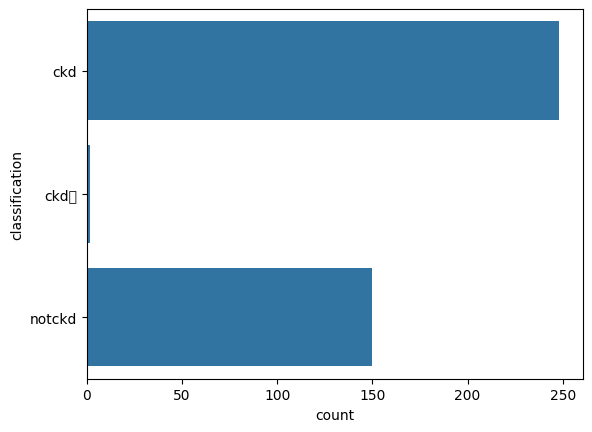

In [10]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(dataset['classification'])

#### Variável "rbc" (Glóbulos Vermelhos)

In [11]:
# Tabela de Frequência da Variável "rbc"
dataset.rbc.value_counts()

,count
rbc,
normal,201
abnormal,47


<Axes: xlabel='count', ylabel='rbc'>

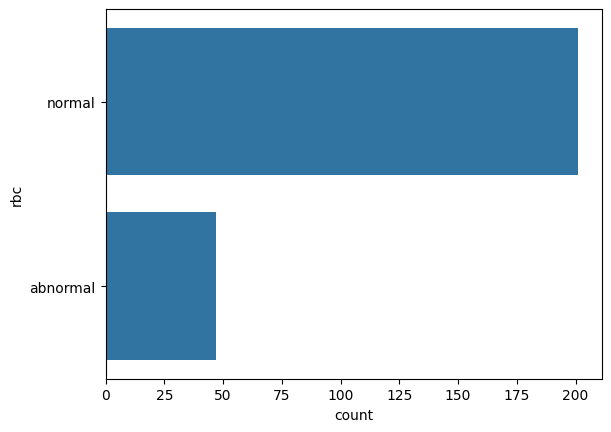

In [12]:
# Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(dataset['rbc'])

#### Variável "ba" (Presença de Bactérias)

In [13]:
# Tabela de Frequência da Variável "ba"
dataset.ba.value_counts()

,count
ba,
notpresent,374
present,22


<Axes: xlabel='count', ylabel='ba'>

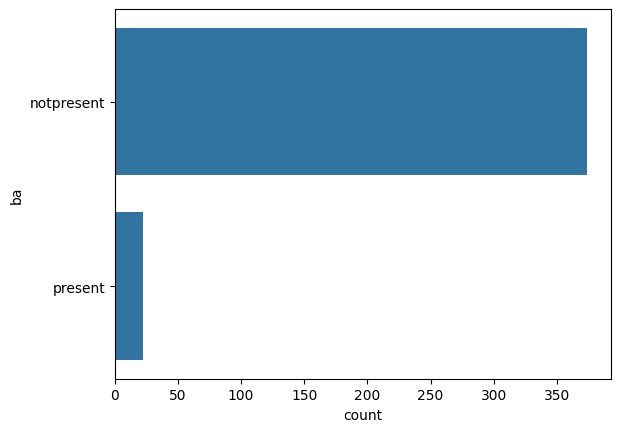

In [14]:
# Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(dataset['ba'])

#### Variável 'pc' (Células de pus)

In [15]:
# Tabela de Frequência da Variável "pc"
dataset.pc.value_counts()

,count
pc,
normal,259
abnormal,76


<Axes: xlabel='count', ylabel='pc'>

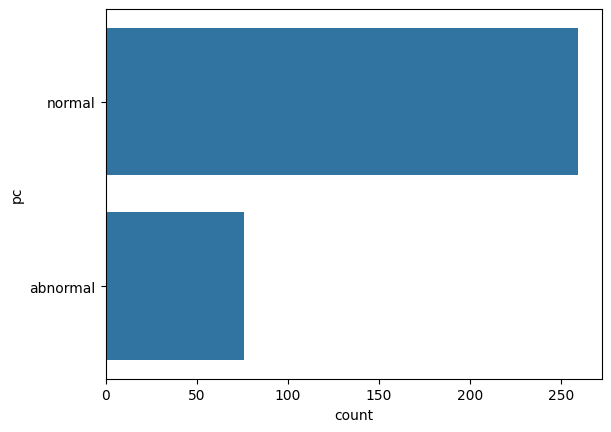

In [16]:
# Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(dataset['pc'])

#### Variável Idade

In [17]:
# Tabela de Frequência da Variável "ba"
dataset.age.value_counts()

,count
age,
60.0,19
65.0,17
50.0,12
48.0,12
55.0,12
...,...
90.0,1
2.0,1
78.0,1


<Axes: xlabel='age', ylabel='Count'>

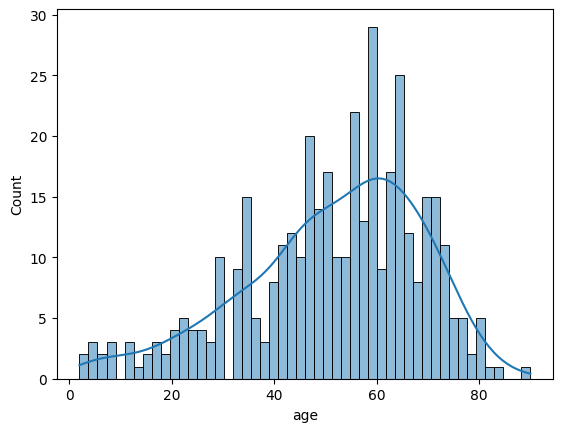

In [18]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(dataset['age'], bins=50, kde=True)

### **3. Pré-Processamento dos Dados**

#### Algumas ações para corrigir os dados:

  * Tratar valores missing
  * Eliminar registros Duplicados
  * Transformações para deixar as variáveis na mesma escala
  * Conversão de de Variáveis "Object" em numéricas
  * Eliminação de variáveis que não ajudam na previsão
  * Criação de variáveis novas
  * Demais tratamentos nos dados antes de criar as Máquinas Preditivas

In [19]:
# Tipo das Variáveis (numeros ou texto?):
dataset.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [20]:
# Eliminando Variáveis desnecessárias (CPF não é explicativa) :
dataset = dataset.drop('id', axis=1)

### Substituindo Valores categóricos (object) em números:

#### 1. rbc

In [21]:
# Tabela de Frequência
dataset['rbc'].value_counts()

,count
rbc,
normal,201
abnormal,47


In [22]:
# Fazer a substituição por valores numéricos
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [23]:
# Tabela de Frequência
dataset['rbc'].value_counts()

,count
rbc,
0.0,201
1.0,47


#### 2. pc

In [24]:
# Tabela de Frequência
dataset['pc'].value_counts()

,count
pc,
normal,259
abnormal,76


In [25]:
# Fazer a substituição por valores numéricos
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [26]:
# Tabela de Frequência
dataset['pc'].value_counts()

,count
pc,
0.0,259
1.0,76


#### 3. pcc

In [27]:
# Tabela de Frequência
dataset['pcc'].value_counts()

,count
pcc,
notpresent,354
present,42


In [28]:
# Fazer a substituição por valores numéricos
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})

In [29]:
# Tabela de Frequência
dataset['pcc'].value_counts()

,count
pcc,
0.0,354
1.0,42


#### 4. ba

In [30]:
# Tabela de Frequência
dataset['ba'].value_counts()

,count
ba,
notpresent,374
present,22


In [31]:
# Fazer a substituição por valores numéricos
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})

In [32]:
# Tabela de Frequência
dataset['ba'].value_counts()

,count
ba,
0.0,374
1.0,22


#### 5. htn

In [33]:
# Tabela de Frequência
dataset['htn'].value_counts()

,count
htn,
no,251
yes,147


In [34]:
# Fazer a substituição por valores numéricos
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 6. dm

In [35]:
# Tabela de Frequência
dataset['dm'].value_counts()

,count
dm,
no,258
yes,134
\tno,3
\tyes,2
yes,1


In [36]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})

In [37]:
# Fazer a substituição por valores numéricos
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [38]:
# Tabela de Frequência
dataset['dm'].value_counts()

,count
dm,
0.0,261
1.0,137


#### 7. cad

In [39]:
# Tabela de Frequência
dataset['cad'].value_counts()

,count
cad,
no,362
yes,34
\tno,2


In [40]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})

In [41]:
# Fazer a substituição por valores numéricos
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [42]:
# Tabela de Frequência
dataset['cad'].value_counts()

,count
cad,
0.0,364
1.0,34


#### 8. appet

In [43]:
# Tabela de Frequência
dataset['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [44]:
# Fazer a substituição por valores numéricos
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

In [45]:
# Tabela de Frequência
dataset['appet'].unique()

array([ 1.,  0., nan])

#### 9. pe

In [46]:
# Tabela de Frequência
dataset['pe'].value_counts()

,count
pe,
no,323
yes,76


In [47]:
# Fazer a substituição por valores numéricos
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [48]:
# Tabela de Frequência
dataset['pe'].value_counts()

,count
pe,
0.0,323
1.0,76


#### 10. ane

In [49]:
# Tabela de Frequência
dataset['ane'].value_counts()

,count
ane,
no,339
yes,60


In [50]:
# Fazer a substituição por valores numéricos
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 11. classification

In [51]:
# Tabela de Frequência
dataset['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [52]:
# Fazer a substituição por valores numéricos
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})

In [53]:
# Fazer a substituição por valores numéricos
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [54]:
# Tabela de Frequência
dataset['classification'].value_counts()

,count
classification,
1,250
0,150


In [55]:
# Verificando os primeiros registros(pacientes)
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [56]:
# Verificando o tipo das variáveis:
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,float64
pc,float64
pcc,float64
ba,float64
bgr,float64


### Convertento variáveis "Object" em numéricas:

In [57]:
# Tabela de Frequência
dataset['rc'].value_counts()

,count
rc,
5.2,18
4.5,16
4.9,14
4.7,11
3.9,10
4.8,10
3.4,9
4.6,9
3.7,8


In [58]:
# Fazer a formatação para valores numéricos
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [59]:
# Tipos das Variáveis (núméricas ou object/string):
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,float64
pc,float64
pcc,float64
ba,float64
bgr,float64


In [60]:
# Estatística Descritiva das variáveis:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

,0
rbc,152
rc,131
wc,106
pot,88
sod,87
pcv,71
pc,65
hemo,52
su,49
sg,47


### Substituição/eliminação (ou também conhecido como imputação) de valores ausentes(missings):

*Os valores ausentes serão substituídos pela mediana.

In [62]:
# Verificando a lista de Colunas
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [63]:
#Criando uma lista com o nome das Colunas para usar na substituição de missings)
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [64]:
# Função utilizada para varrer (loop) as colunas e a cada valor missing encontrado,
# ele será substituído pela median
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [65]:
# Confere se ainda persiste valor missing
dataset.isnull().any().sum()

np.int64(0)

### Heatmap - Mapa que verifica correlação entre as variáveis

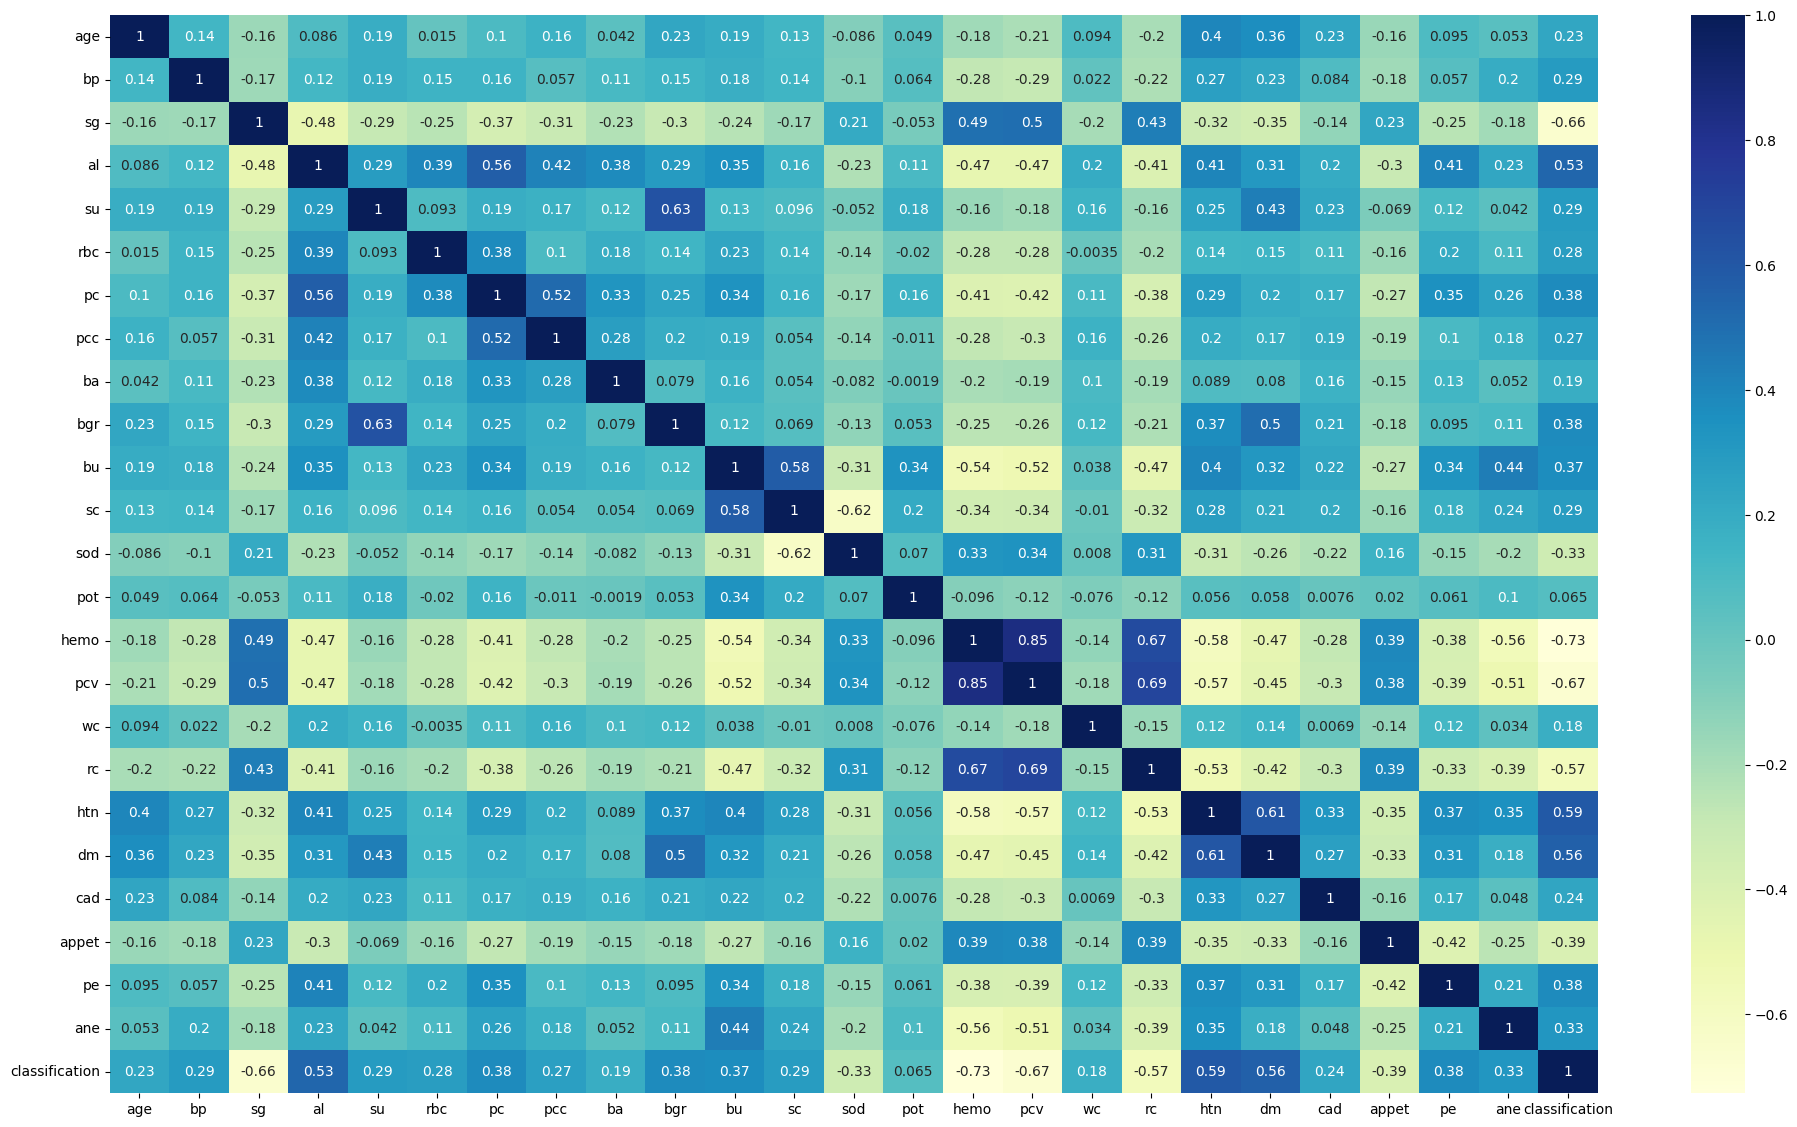

In [66]:
# Criação da Figura Gráfica
plt.figure(figsize=(24,14))
# Criação do Gráfico heatmap
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()


- Vemos claramente que a variável 'pcv' and 'hemo' podem nos dar um problema chamado **85% multicollinearity**
- Para resolver esse problema, vamos eliminar uma delas: a **pcv**

In [67]:
# Eliminando a 'pcv'
dataset.drop('pcv', axis=1, inplace=True)

In [68]:
# Visualizando os Primeiros Registros
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


<Axes: ylabel='count'>

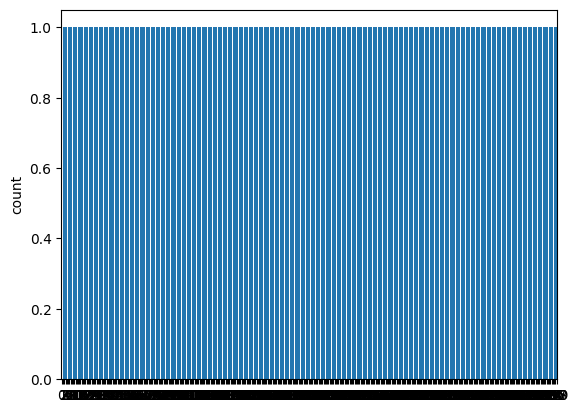

In [69]:
# Visualizando o Target:
sns.countplot(dataset['classification'],saturation=0.95 )

### Separação/split das Variáveis explicativas (X) e o Target (y) para treinamento do algoritmo na Máquina Preditiva

In [70]:
# Separando as Variáveis Explicativas em "X" e o Target (a variável que queremos prever, em "Y"):
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [71]:
y.head()

,classification
0,1
1,1
2,1
3,1
4,1


## ** 4. Construção e Avaliação da Máquina Preditiva**

In [72]:
# Verificando quais Features são as mais Importantes:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt



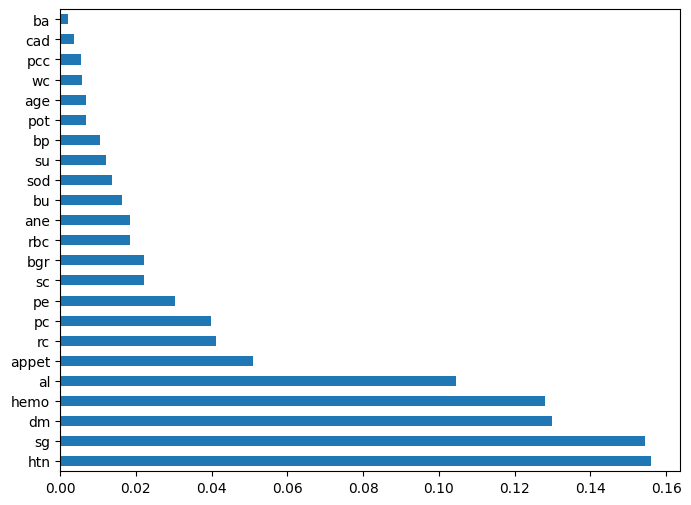

In [73]:
# Usando o ExtraTree  para nos mostrar as Variáveis mais Importantes
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [74]:
#Função para ranquear as 8 mais importantes
ranked_features.nlargest(8).index

Index(['htn', 'sg', 'dm', 'hemo', 'al', 'appet', 'rc', 'pc'], dtype='object')

In [75]:
# Separando as 8 variáveis mais importantes em "X" para que o algoritmo treine com esses dados
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [76]:
#Função para ver os últimos registros
X.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [77]:
#Verificando o target
y.head()

,classification
0,1
1,1
2,1
3,1
4,1


In [78]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=50)

In [79]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


Obs: Existem algoritmos que esperam receber dados normalizados (dados que estejam numa mesma escala). Não faremos isso, pois os algoritmos que vamos usar não necessariamente requer que façamos isso. Eles são conhecidos como "Não-Paramétricos".

Criando o BaseLine com o Algoritmo **RandomForest**

In [80]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
#Realizando o treinamento (fit) com os dados de treino
RandomForest = RandomForestClassifier(random_state=50)
RandomForest = RandomForest.fit(X_train,y_train)

In [82]:
# Fazendo Previsões com dados de teste:
y_predRF = RandomForest.predict(X_test)

In [83]:
# Avaliando a Performance comparando com o gabarito (y) de teste:
print('Accuracy:', accuracy_score(y_test,y_predRF))
print(classification_report(y_test,y_predRF))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        87

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



Criando a Máquina Preditiva com o Algoritmo **GradientBoosting**

In [84]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier(n_estimators=2000, random_state=50)
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_predGB = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_predGB))

print(classification_report(y_test,y_predGB))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.97      0.98        87

    accuracy                           0.97       120
   macro avg       0.96      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



Salvamento da Máquina Preditiva

In [85]:
# Creating a pickle file for the classifier
import pickle
filename = 'RandomForest.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))